# Machine Learning - Spam or Ham? A Spam Classifier

- The Dataset: http://nlp.cs.aueb.gr/software_and_datasets/Enron-Spam/index.html

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_files

X, y = [], []
for i in range(1,7):
    emails = load_files(f"../input/enron-spam/enron{i}")
    X = np.append(X, emails.data)
    y = np.append(y, emails.target)

classes = emails.target_names

In [3]:
print(f"X.shape: {X.shape:}")
print(f"y.shape: {y.shape}")
print("\n")
print(f"X[0]: {X[0]}")
print("\n")
print(f"X[0] belongs to {y[0]} class ({classes[int(y[0])]})")

X.shape: (33715,)
y.shape: (33715,)


X[0]: b'Subject: nesa / hea \' s 24 th annual meeting\r\nsaddle up for nesa / hea \' s 24 th annual meeting\r\n" deep in the heart of texas "\r\nseptember 9 - 11 , 2001\r\nhyatt regency hill country resort\r\nsan antonio , texas\r\nthe annual meeting planning committee has put together an outstanding\r\nprogram for your review . it is attached below in an adobe acrobat pdf file\r\n- if you have problems with the attachment please call nesa / hea\r\nheadquarters at ( 713 ) 856 - 6525 and we \' ll mail or fax a copy out immediately .\r\ngeneral session topics include :\r\n* will tomorrow \' s restructured electric infrastructure support\r\ntomorrow \' s economy ?\r\n* power deregulation panel : developer / ipp , utility / transmission , power\r\nmarketer , government , retail\r\n* power demand\r\n* the state of the energy industry\r\n* new political administration - impact on energy policy and\r\nenvironment\r\nnetworking opportunities :\r\n* opening

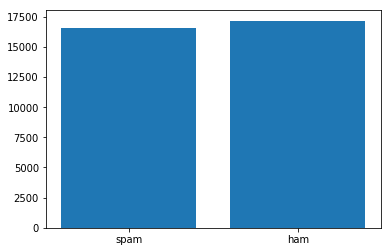

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(Counter(y).keys(), Counter(y).values(),tick_label =('spam', 'ham'))
plt.show;

In [5]:
import re

X_new = []

for email in range(0, len(X)): 
    
    # Remove special characters
    text = re.sub(r'\\r\\n', ' ', str(X[email]))
    text = re.sub(r'\W', ' ', text)
    
    # Remove single characters from letters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # Substitute multiple spaces for one space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove the 'b' that appears at the beginning
    text = re.sub(r'^b\s+', '', text)

    # Convert all text to lowercase
    text = text.lower()

    # append text to new dataset of features X
    X_new.append(text)

In [6]:
print(f"Example of X_new[0]: {X_new[0]}")
print("\n")
print(f"Class of X_new[0] is {y[0]} ({classes[int(y[0])]})")

Example of X_new[0]: subject nesa hea 24 th annual meeting saddle up for nesa hea 24 th annual meeting deep in the heart of texas september 9 11 2001 hyatt regency hill country resort san antonio texas the annual meeting planning committee has put together an outstanding program for your review it is attached below in an adobe acrobat pdf file if you have problems with the attachment please call nesa hea headquarters at 713 856 6525 and we ll mail or fax copy out immediately general session topics include will tomorrow restructured electric infrastructure support tomorrow economy power deregulation panel developer ipp utility transmission power marketer government retail power demand the state of the energy industry new political administration impact on energy policy and environment networking opportunities opening reception sunday september 9 golf tournament tours of area attractions monday september 10 the hyatt regency hill country resort has limited block of rooms available for ne

In [8]:
# Split the data into training and testing datasets
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)

In [9]:
# Apply the Naive Bayes classifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('classifier', MultinomialNB())])

clf_pipeline.fit(X_train, y_train)
predictions = clf_pipeline.predict(X_train)
score = accuracy_score(y_train,predictions)
print(f"Training Accuracy: {score*100:.2f}%")

predictions_test = clf_pipeline.predict(X_test)
score = accuracy_score(y_test, predictions_test)
print(f"Testing Accuracy: {score*100:.2f}%")
print()

print("Confusion Matrix:")
y_true = pd.Series(y_test, name='Real')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

Training Accuracy: 99.13%
Testing Accuracy: 98.80%

Confusion Matrix:


Predicted,0.0,1.0
Real,,
0.0,4938,50
1.0,71,5056


In [11]:
# Test the prediction using the text below:

text = """Folks.
I have a meeting today to discuss a research project, and then I was invited to a meeting with the campus 
board about continuing the Data Science specialization course.
This second meeting is expected to start at 5 pm and will likely extend until after our class start time.
That way, I think it's best to release you from today's class.
Today's content is “data wrangling,” which corresponds to chapters 5 through 8 of the book Python for 
Data Analysis, which is part of the file I sent you earlier this semester. Please read these chapters 
(they are short) and do the exercises during this week.
In our next class we will start with a section of questions about these materials and then we will talk 
about feature selection selection.
See you on the 31st, then.
Regards, Jefferson Andrade."""

predicted = clf_pipeline.predict([text])
probability  = np.max(clf_pipeline.predict_proba([text]))

print(f"The predicted class is {predicted} = {classes[int(predicted)]} with a probability of {probability*100:.2f}%")

The predicted class is [0.] = ham with a probability of 98.19%


In [12]:
# Function to predict whether a class is spam or not (along with its probability for being given it's label)

def spamOrHam(message):
    newMessage = open(message,"r", encoding="utf8") 
    text = newMessage.read()
    newMessage.close()
    predictedMessage = clf_pipeline.predict([text])
    probability  = np.max(clf_pipeline.predict_proba([text]))
    print(f"Text: {texto}")
    print("\n")
    print(f"The predicted class is {predicted} = {classes[int(predicted)]} with a probability {probability*100:.2f}%")
    
# Usage
# spamOrHam("text.txt")

In [13]:
# Saving the template to a pickle file using joblib...
import joblib

joblib.dump(clf_pipeline, 'model.pkl')

['model.pkl']